In [1]:
from sklearn.datasets import fetch_california_housing
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import os
sns.set()

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

plt.style.use('bmh')

In [2]:
data1 = pd.read_csv('feature importance/ft_importancesSHAP_RF_rfgbfml.csv', low_memory=False)
data2 = pd.read_csv('feature importance/ft_importancesSHAP_RF_rfgfrpc.csv', low_memory=False)

data1.rename(columns={'Unnamed: 0':'feature'}, inplace=True)
data2.rename(columns={'Unnamed: 0':'feature'}, inplace=True)



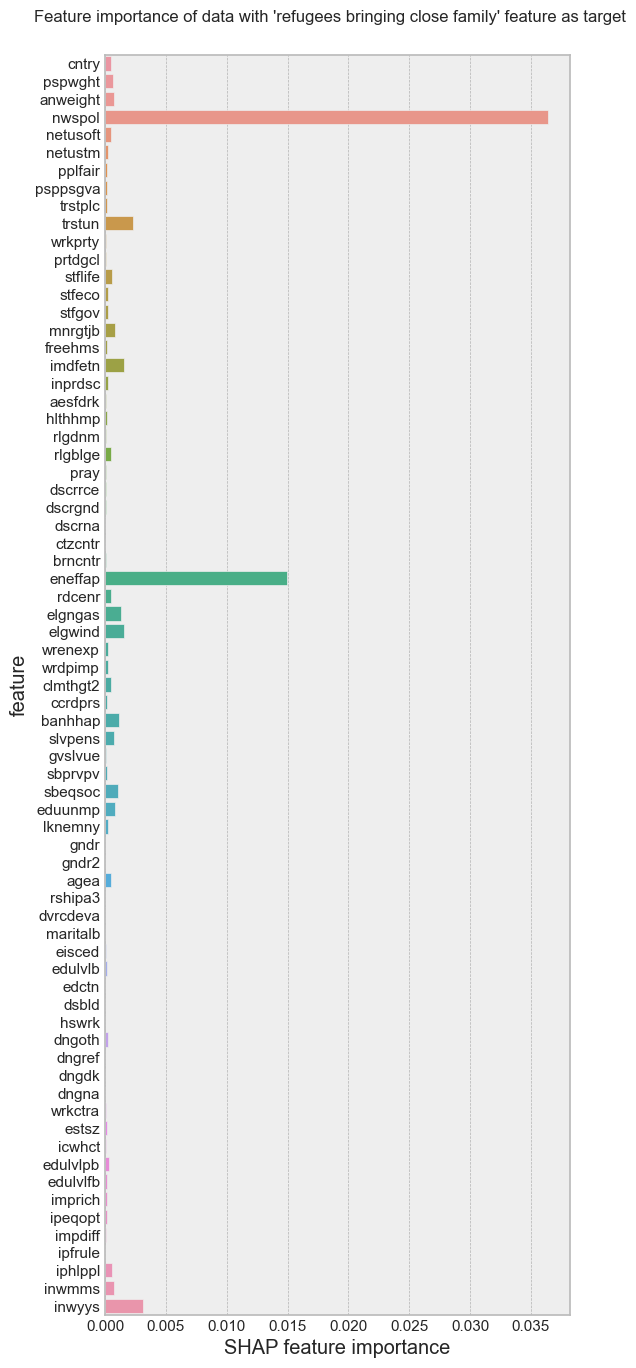

In [3]:
fig, ax = plt.subplots(figsize=(6, 15))
fig.subplots_adjust(top=0.95)
sns.set_color_codes("pastel")
sns.barplot(x='0', y='feature', data=data1)
fig.suptitle("Feature importance of data with 'refugees bringing close family' feature as target", fontsize=12)
ax.set_xlabel('SHAP feature importance')
plt.savefig('figures/example1_barplotfeatimp.png', bbox_inches='tight', dpi=300);

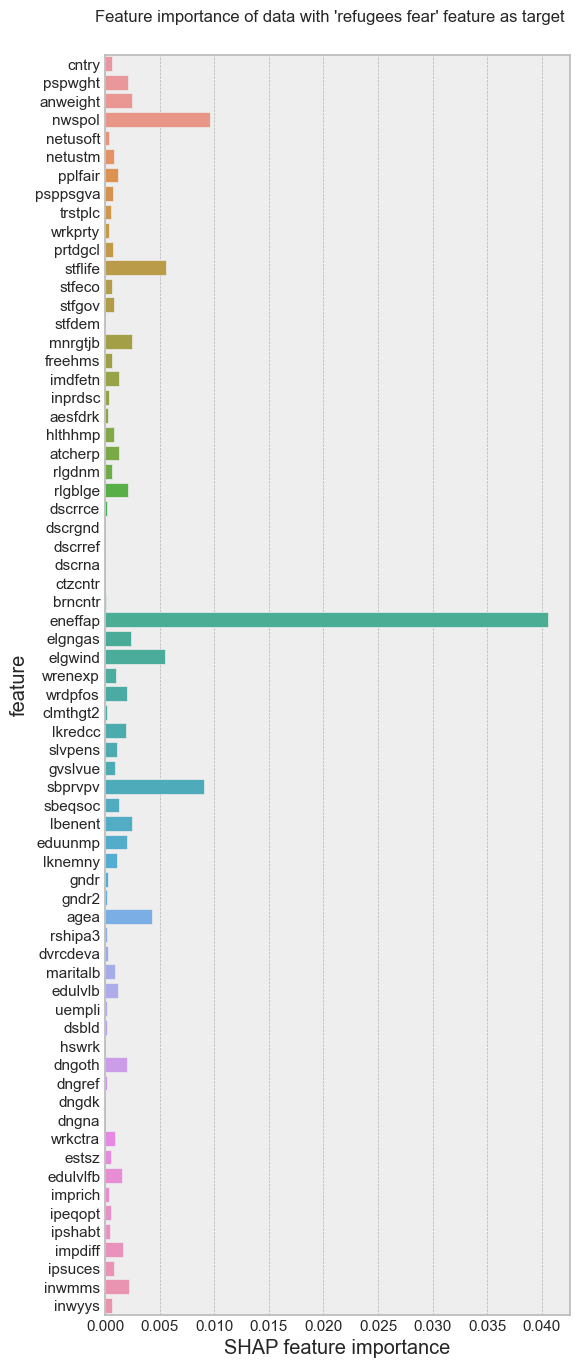

In [4]:
fig, ax = plt.subplots(figsize=(6, 15))
fig.subplots_adjust(top=0.95)
sns.set_color_codes("pastel")
sns.barplot(x='0', y='feature', data=data2)
fig.suptitle("Feature importance of data with 'refugees fear' feature as target", fontsize=12)
ax.set_xlabel('SHAP feature importance')
plt.savefig('figures/example2_barplotfeatimp.png', bbox_inches='tight', dpi=300);

## Plots of the results

In [16]:
def multi_csv_to_df(files):

    lst = []

    for filename in files:
        df = pd.read_csv(filename, index_col=None, header=0)
        lst.append(df)

    df_results = pd.concat(lst, axis=0, ignore_index=True)
    return df_results

In [23]:
# print(os.getcwd())
# extract all files from RF performance results directory
path = str(os.getcwd())+'/parameter_search_outputs/RF/'
results_RF = glob.glob(os.path.join(path, '*.csv'))

df_results_RF = multi_csv_to_df(results_RF)
df_results_RF.rename(columns={'Unnamed: 0': 'model'}, inplace=True)
df_results_RF.head(5)

,model,number estimators,max features,max depth,min split,min leaf,accuracy,balanced accuracy,ROC,F1,Matthews
0,model 0,100.0,16.0,11.0,4.0,3.0,0.995629,0.979926,0.979926,0.997617,0.971290
1,model 1,68.0,12.0,8.0,3.0,2.0,0.995662,0.980127,0.980127,0.997636,0.971513
2,model 2,225.0,35.0,24.0,6.0,5.0,0.995629,0.979926,0.979926,0.997617,0.971290
3,best model,68.0,12.0,8.0,3.0,2.0,0.994812,0.976619,0.976619,0.997170,0.966123
4,model 0,218.0,32.0,23.0,5.0,5.0,0.963751,0.814401,0.814401,0.980452,0.747150


In [25]:
# create subset of best models
df_bestresults_RF = df_results_RF.loc[df_results_RF['model'] == 'best model'].reset_index(drop=True)
df_bestresults_RF.head(5)

,model,number estimators,max features,max depth,min split,min leaf,accuracy,balanced accuracy,ROC,F1,Matthews
0,best model,68.0,12.0,8.0,3.0,2.0,0.994812,0.976619,0.976619,0.997170,0.966123
1,best model,270.0,39.0,28.0,6.0,6.0,0.964500,0.815957,0.815957,0.980905,0.742411
2,best model,228.0,31.0,24.0,6.0,5.0,0.925451,0.537538,0.537538,0.961036,0.221030
3,best model,218.0,35.0,23.0,5.0,5.0,0.921969,0.866837,0.866837,0.948057,0.806716
4,best model,249.0,32.0,26.0,6.0,5.0,0.826734,0.779539,0.779539,0.876856,0.592216


In [38]:
# targets
data3 = pd.read_csv('ESS8 data/ESS8_subset_cleaned_timeadj_wmissingvals.csv', low_memory=False)
# make df with missingness percentage of features with missingness
missing_cols = data3.columns[data3.isnull().any()].to_list()
percent_missing = data3[missing_cols].isnull().sum() * 100 / len(data3)
missing_info = pd.DataFrame({'column name':missing_cols,
                             'percentage missing':percent_missing})

# extract rows with > 5% missing (75 features)
many_missing = missing_info[missing_info['percentage missing'] > 5]
targets = many_missing['column name'].tolist()

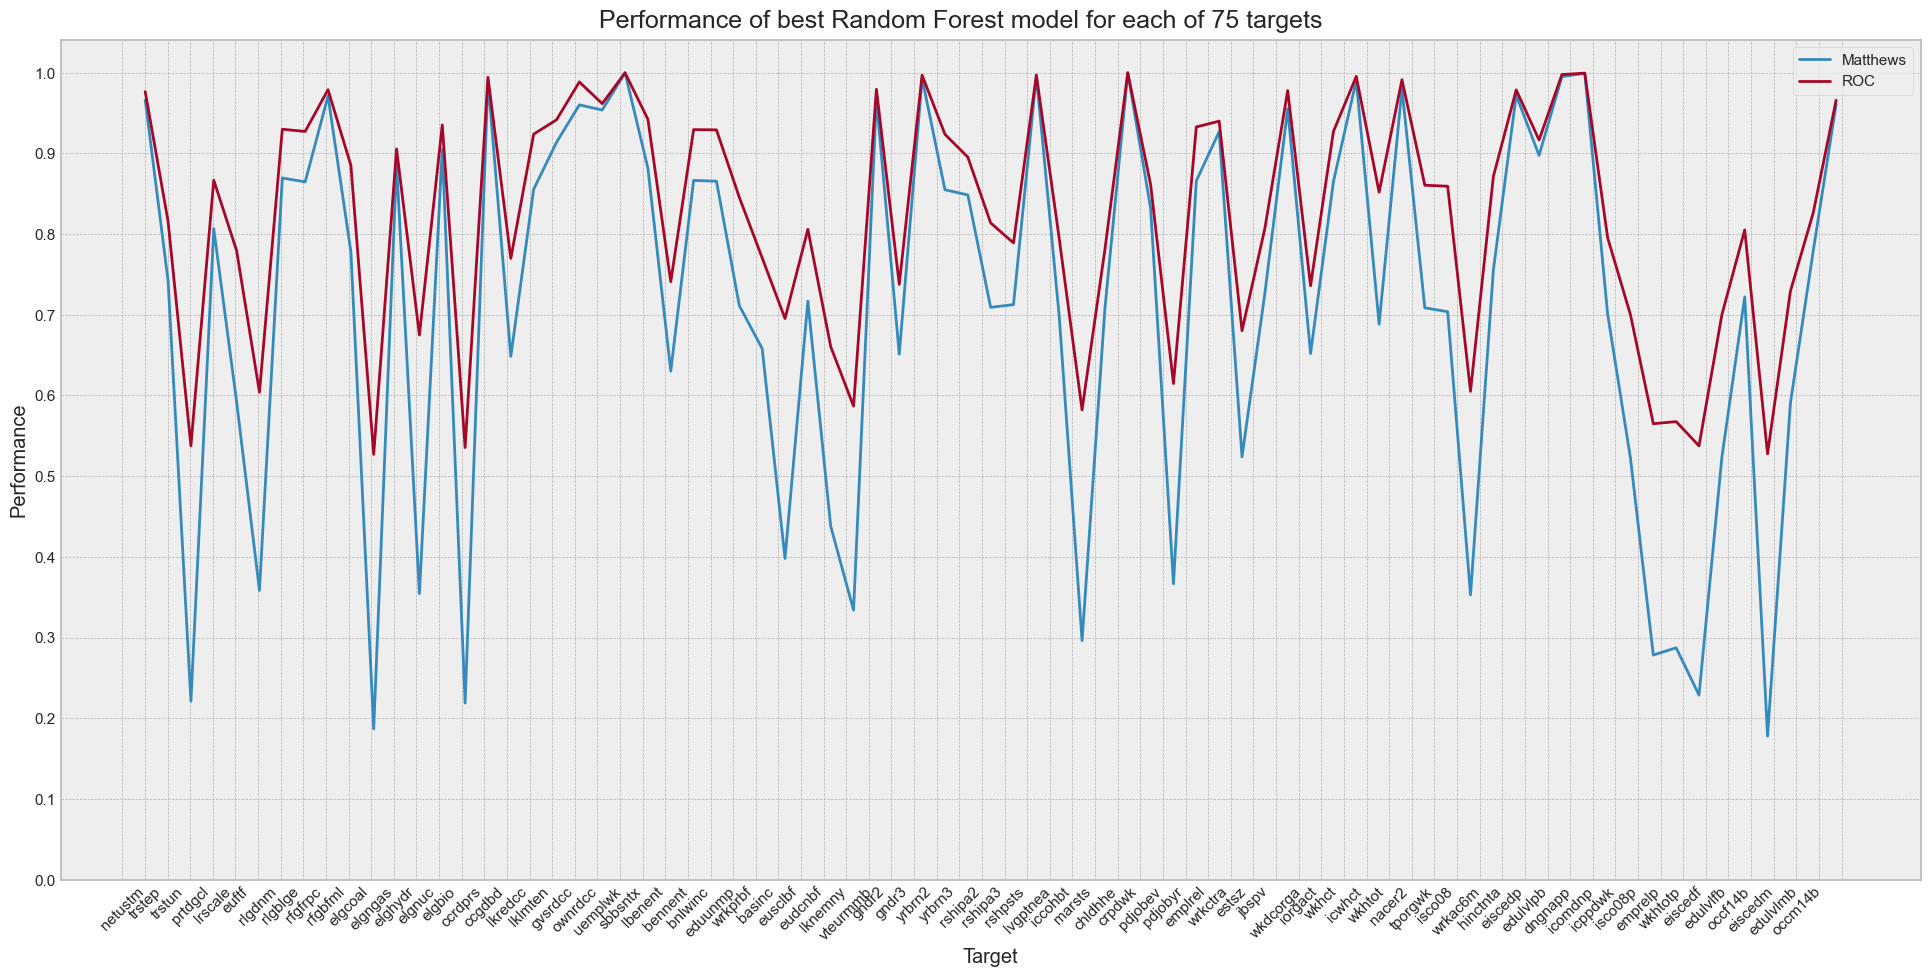

In [57]:
fig, ax = plt.subplots(figsize=(24, 10))
fig.subplots_adjust(top=0.95)
sns.set_color_codes("pastel")
sns.lineplot(df_bestresults_RF[['Matthews', 'balanced accuracy']], markers=False, dashes=True)
fig.suptitle("Performance of best Random Forest model for each of 75 targets", fontsize=18)
ax.set_xlabel("Target")
ax.set_ylabel("Performance")
ax.set_xticklabels(targets)
plt.xticks(np.arange(-1, 75, 0.99), rotation=45, size=11)
plt.yticks(np.arange(0, 1.01, 0.1), size=11)
plt.savefig('figures/lineplot_performance_best_RF.png', bbox_inches='tight', dpi=300);




In [52]:
# calculate average for each column
df_summ_RF = df_bestresults_RF[['accuracy', 'balanced accuracy', 'ROC', 'F1', 'Matthews']].mean(axis=0)
df_summ_RF

accuracy             0.940612
balanced accuracy    0.823808
ROC                  0.823808
F1                   0.952237
Matthews             0.713498
dtype: float64

## Feature importance RF

In [70]:
# two examples of feature importance
df_importance_RF_rlgblge = pd.read_csv('feature importance/RF/ft_importancesSHAP_RF_rlgblge.csv')
df_importance_RF_ccrdprs = pd.read_csv('feature importance/RF/ft_importancesSHAP_RF_ccrdprs.csv')

df_importance_RF_rlgblge = df_importance_RF_rlgblge.rename(columns={'Unnamed: 0':'feature'})
# df_importance_RF_rlgblge = df_importance_RF_rlgblge[['0']]

df_importance_RF_ccrdprs = df_importance_RF_ccrdprs.rename(columns={'Unnamed: 0':'feature'})
# df_importance_RF_ccrdprs = df_importance_RF_ccrdprs[['0']]


#'ESS8 data/ESS8_subset_cleaned_timeadj_wmissingvals.csv', low_memory=False

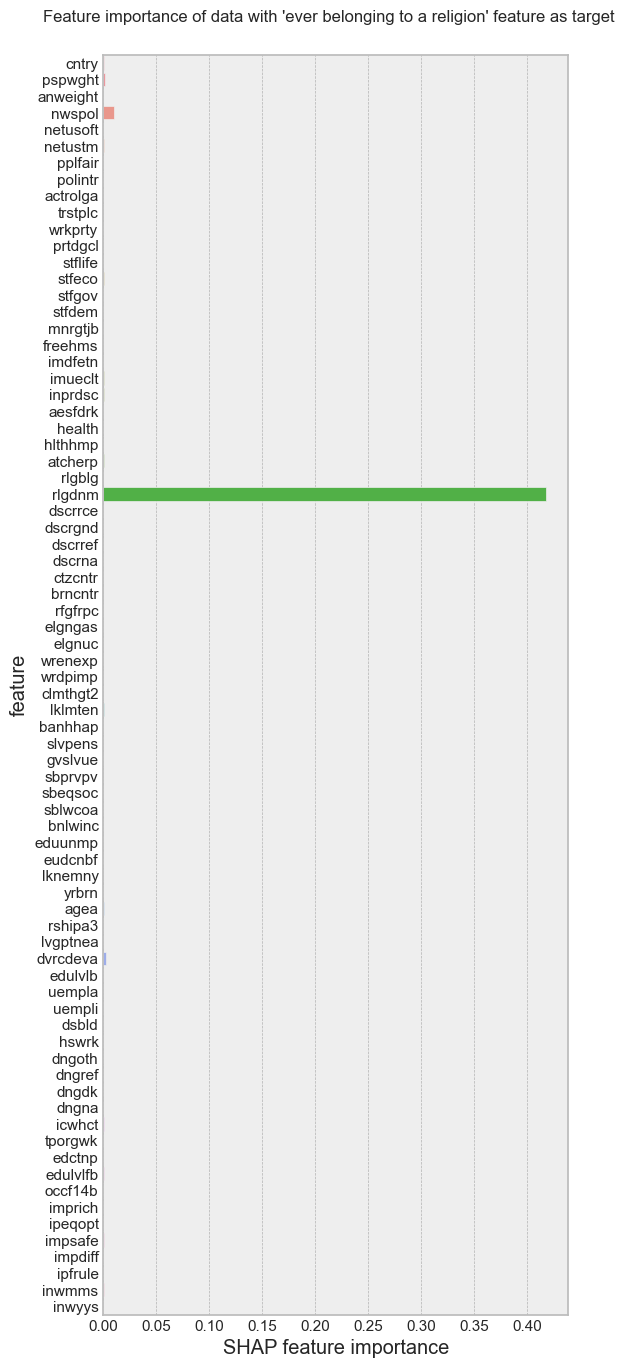

In [71]:
fig, ax = plt.subplots(figsize=(6, 15))
fig.subplots_adjust(top=0.95)
sns.set_color_codes("pastel")
sns.barplot(x='0', y='feature', data=df_importance_RF_rlgblge)
fig.suptitle("Feature importance of data with 'ever belonging to a religion' feature as target", fontsize=12)
ax.set_xlabel('SHAP feature importance')
plt.savefig('figures/RF_rlgblge_barplotfeatimp.png', bbox_inches='tight', dpi=300);


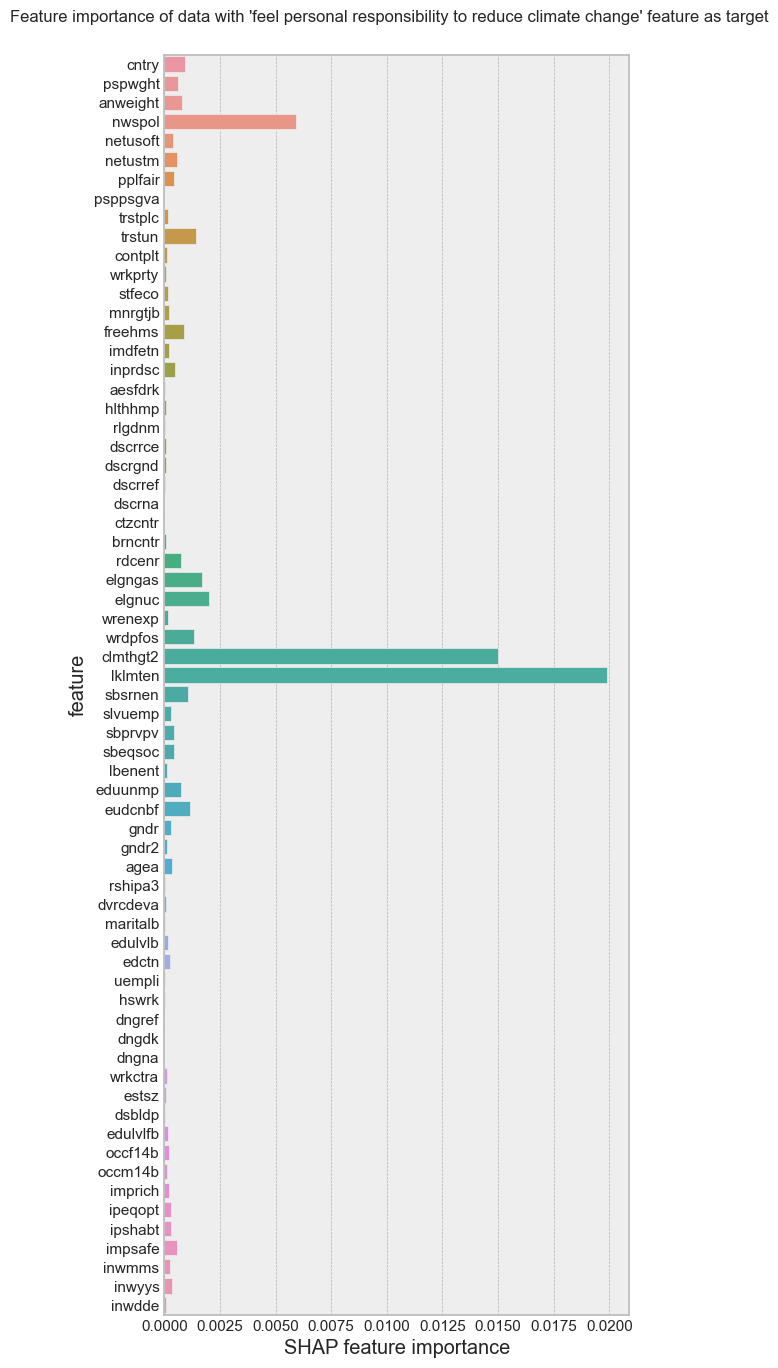

In [72]:
fig, ax = plt.subplots(figsize=(6, 15))
fig.subplots_adjust(top=0.95)
sns.set_color_codes("pastel")
sns.barplot(x='0', y='feature', data=df_importance_RF_ccrdprs)
fig.suptitle("Feature importance of data with 'feel personal responsibility to reduce climate change' feature as target", fontsize=12)
ax.set_xlabel('SHAP feature importance')
plt.savefig('figures/RF_ccrdprs_barplotfeatimp.png', bbox_inches='tight', dpi=300);

